# Exploring Pokemon Data

This file contains an exploratory data analysis of the dataset: "The Complete Pokemon Dataset". 

Let's get a better look at what our data is:

In [10]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv("../data/pokemon.csv")
df.shape

(801, 41)

We can see here that there are 801 one rows, which corresponds to the 801 pokemon released in Generation 7 of the pokemon games, specifically pokemon that were released before the Pokemon Ultra Sun and Ultra Moon games (which added 8 event pokemon). We can also see that there are 41 different variates. 

Let's take a look at these variates and also the first few entries.

In [12]:
df.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


Let's also check the datatypes of each variate:

In [70]:
df.dtypes

abilities             object
against_bug          float64
against_dark         float64
against_dragon       float64
against_electric     float64
against_fairy        float64
against_fight        float64
against_fire         float64
against_flying       float64
against_ghost        float64
against_grass        float64
against_ground       float64
against_ice          float64
against_normal       float64
against_poison       float64
against_psychic      float64
against_rock         float64
against_steel        float64
against_water        float64
attack                 int64
base_egg_steps         int64
base_happiness         int64
base_total             int64
capture_rate          object
classfication         object
defense                int64
experience_growth      int64
height_m             float64
hp                     int64
japanese_name         object
name                  object
percentage_male      float64
pokedex_number         int64
sp_attack              int64
sp_defense    

It's interesting that capture_rate is an object. It should also be an integer. Upon further digging, we can find that this is because one Pokemon called Minior has the following capture_rate "30 (Meteorite)255 (Core)". This is because this Pokemon has two different forms. So to resolve this when making a model in the future, we will change this to be 30 as that is the Pokemon in its natural form.

We can see that there are a bunch of variates for type weaknesses. For example, against_fire is the degree to which a pokemon recieves damage. So here, Bulbasaur (entry 1), against_fire is 2 because fire deals 2x damage to grass-types. There is 18 types (normal, fire, water, electric, grass, ice, fighting, poison, ground, flying, psychic, bug, rock, ghost, dragon, dark, steel and fairy)

We also have the following other key variates:
- abilities: Refers the the different abilities a pokemon could have (a list of at least 1)
- name and japanese_name: Name of the Pokemon (in english and japanese)
- type1 and type2: the primary and secondary type of the pokemon respectively
- hp, atk, def, sp_attack, sp_defense, speed, base_total: the stats of the pokemon. base_total is the sum of the other stats  (higher the base_total, the stronger the pokemon).
- pokedex_identifier: unique id in the pokedex
- generation: the generation (the series of games) that the pokemon was released
- percent_male: percent that any random pokemon is male (1 - percent_male = percent of female pokemon)
- height_m, weight_kg: the height and weight of a pokemon (in metres and kilograms respectively)
- is_legendary: binary variate where 1 if a pokemon is a legendary pokemon while 0 is a regular pokemon

So let's create some plots to see if we can find any general trends within the data. Specifically with regards to is_legendary as the response variate.

<AxesSubplot:xlabel='base_total', ylabel='is_legendary'>

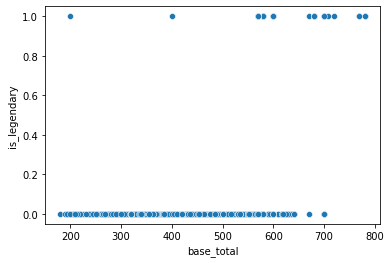

In [13]:
sns.scatterplot(x=df['base_total'], y=df['is_legendary'])

Here we can see that most Pokemon are not legendary which makes sense (rarity makes something more legendary). But we can also see that most legendaries have a high base stat total. Aside from 1 or 2. Let's see which legendaries are very off.

In [16]:
rslt_df = df[(df['base_total'] < 500) &  (df['is_legendary'] == 1)]
rslt_df['name']

788     Cosmog
789    Cosmoem
Name: name, dtype: object

We can see that two consecutive legendaries are below 500 while the rest are significantly above that threshold. By looking these two up, we can see that they are from the same evolutionary line (Cosmog evolves into Cosmoem which evolves again into Lunala/Solgaleo). Lunala and Solgaleo are both legendaries who fit the typical legendary base stats. 

Let's look into some other plots using height, weight, generation.

Before we get into some plots, I have a couple of predictions:
- As height/weight increases, the pokemon is more likely to be a legendary (legendary pokemon seem like they would be more grand and larger)
- As generation goes up, we should expect more legendaries (legendaries sell more games so it can be assumed they'd want to have more in order to appeal to more people)

Now, let's get into some plots!

<AxesSubplot:xlabel='height_m', ylabel='is_legendary'>

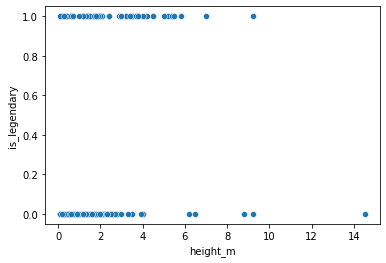

In [20]:
sns.scatterplot(x=df['height_m'], y=df['is_legendary'])

<AxesSubplot:xlabel='weight_kg', ylabel='is_legendary'>

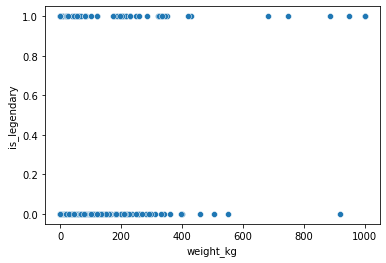

In [19]:
sns.scatterplot(x=df['weight_kg'], y=df['is_legendary'])

(70, 41)

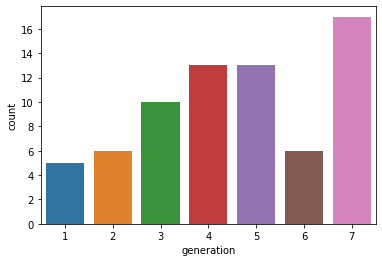

In [33]:
only_legends = df[df['is_legendary'] == 1]
sns.countplot(x=only_legends['generation'])

only_legends.shape

Based on the above plots, we have a couple of observations.

- height and weight seem to have very little effect on whether a pokemon is a legendary which is interesting to note.
- it seems like the number of legendaries is going up as we get deeper into the number of generations (aside from generation 6)

We also have that there are 70 legendaries out of 806 pokemon. Which means that legendaries are still fairly rare. 

Now, let's look at how the types breakdown:

<AxesSubplot:xlabel='type1', ylabel='count'>

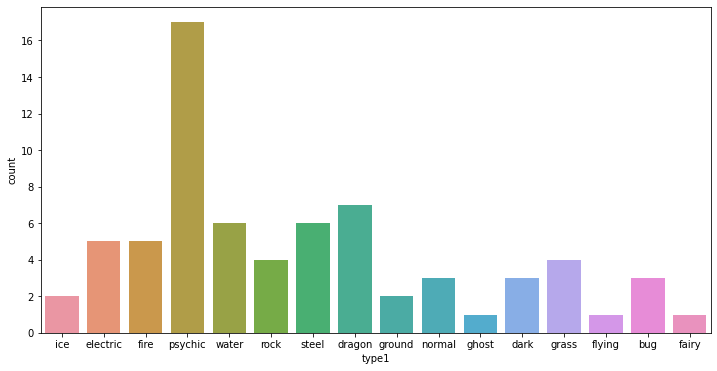

In [61]:
plt.figure(figsize=(12,6))
sns.countplot(x=only_legends['type1'])

<AxesSubplot:xlabel='type2', ylabel='count'>

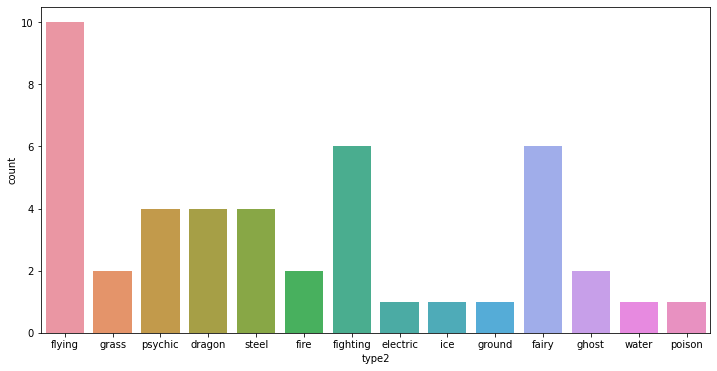

In [64]:
plt.figure(figsize=(12,6))
sns.countplot(x=only_legends['type2'])

<AxesSubplot:xlabel='types', ylabel='count'>

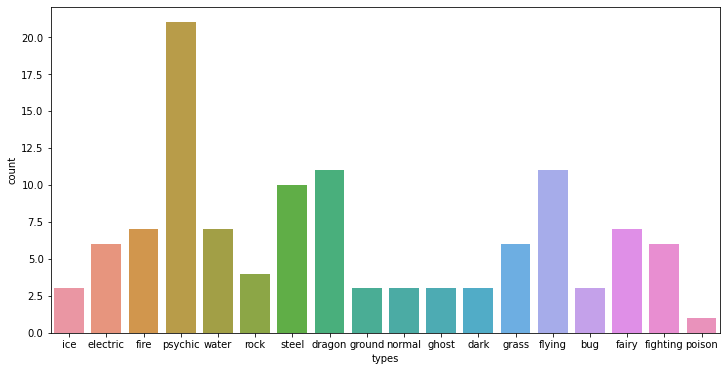

In [65]:
# we want to add the two above plots together
type1s = only_legends['type1'].to_frame().rename(columns={"type1": "types"})
type2s = only_legends['type2'].to_frame().dropna().rename(columns={"type2": "types"})

frames = [type1s, type2s]
result = pd.concat(frames)
plt.figure(figsize=(12,6))
sns.countplot(x=result['types'])

From the above 3 plots, we can see the psychic-type has the most legendaries. We can also see that flying-type has the most legendaries as its secondary typing but very little primary typing. We can also see that poison has the least legendaries. Let's compare this last plot to pokemon overall, to see if this is a trend in the population or just one within the legendary subpopulation.

<AxesSubplot:xlabel='types', ylabel='count'>

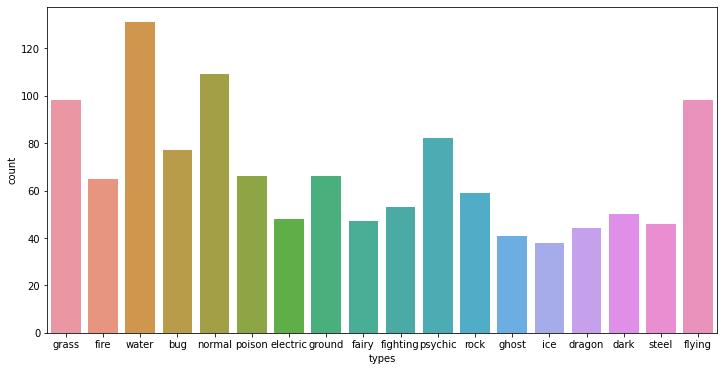

In [66]:
type1s = df['type1'].to_frame().rename(columns={"type1": "types"})
type2s = df['type2'].to_frame().dropna().rename(columns={"type2": "types"})

frames = [type1s, type2s]
result = pd.concat(frames)
plt.figure(figsize=(12,6))
sns.countplot(x=result['types'])

We can see that overall, we have that the Water-type has the most Pokemon overall. But we can also see that flying and psychic (in addition to grass and normal) have the most pokemon overall. While poison also has a respectable amount of overall pokemon which isn't reflected in the amount of legendaries that exist. Does type have an effect on if a Pokemon is a legendary?

Now, let's look into see how each variate is related to the others, i.e is there any correlation/trend between variates?.

<AxesSubplot:>

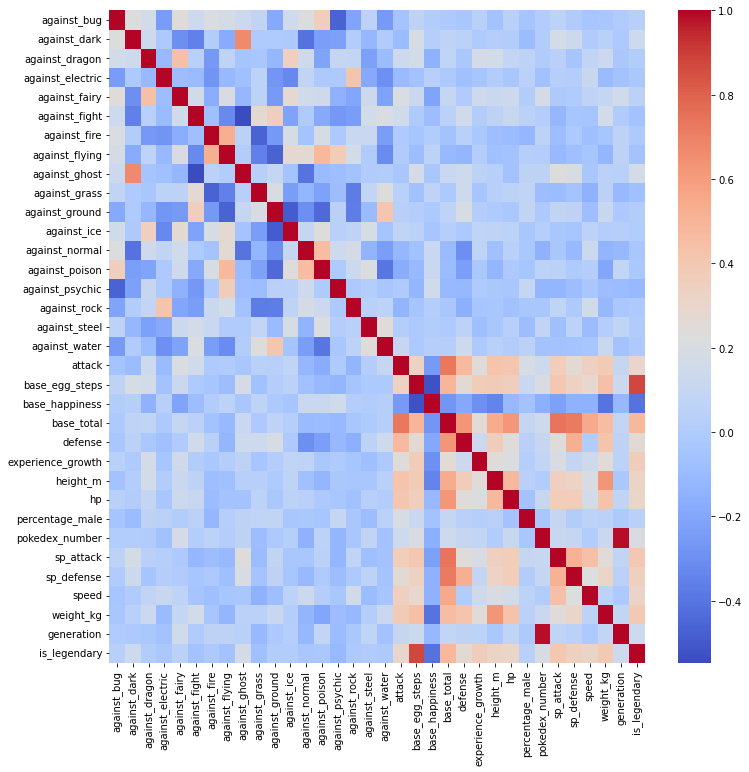

In [69]:
corr_matrix = df.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr_matrix, cmap='coolwarm')

From the above correlogram, we can see the correlations between each set of variates. We can see that the against_[type_name] variates have a pretty random correlation (some are positively correlated while others are negatively correlated). We can also see that the the against_[type_name] variates are mostly negatively correlated with the other variates. While the non-type-weakness variates have a mostly postively correlation. We can also note that there is no variate-pair that has a correlation of -1. 

Note that pokedex_number and generation are perfectly positively correlated as they both go up (if the other goes up) due to the way that Pokemon are released. So, we should remove one of the two to avoid collinearity.

Using the findings from this file, we will proceed with training a model, which can be found in the training file.